# Seminar 3 - Numerical Issues

> To be updated

The unit so far has introduced how algorithms can be implemented in a programming language to solve mathematical problems.

Generally, if you use a computer algoruthm to solve a problem, instead of working something out by analysis, we call it a **numerical method**.

> Example: find the a root of $ax^2 + bx + c = 0$.  An analytical method would be the known formula $x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$.  A numerical method would be to run a bisection search.

This seminar will cover some of the limitations of using a computer to do maths.  We often refer to these as **numerical issues**.




## Algorithms & Computer Programming

In [38]:
a = 1e-12

In [39]:
b = a + 1000000
c = b - 1000000

In [40]:
print(a,b,c)

1e-12 1000000.0 0.0


In [51]:
x = 1
v = 0
k = 1
dt = 0.01
xs = []
vs = []
for ii in range(100000):
    xdot = v
    vdot = -k*x
    x = x+dt*xdot
    v = v + dt*vdot
    print(x,v)
    xs.append(x)
    vs.append(v)

1.0 -0.01
0.9999 -0.02
0.9997 -0.029999
0.99940001 -0.039996000000000004
0.99900005 -0.0499900001
0.998500149999 -0.0599800006
0.997900349993 -0.06996500209999
0.9972006999720001 -0.07994400559992
0.9964012599160009 -0.08991601259964001
0.9955020997900045 -0.09988002519880002
0.9945032995380165 -0.10983504619670006
0.9934049490760495 -0.11978007919208022
0.9922071482841287 -0.1297141286828407
0.9909100069973003 -0.139636200165682
0.9895136449956434 -0.14954530023565502
0.9880181919932869 -0.15944043668561145
0.9864237876264308 -0.16932061860554432
0.9847305814403754 -0.17918485648180862
0.9829387328755573 -0.1890321622962124
0.9810484112525952 -0.19886154962496796
0.9790597957563455 -0.2086720337374939
0.9769730754189706 -0.21846263169505736
0.97478844910202 -0.22823236244924708
0.9725061254775276 -0.2379802469402673
0.9701263230081248 -0.24770530819504255
0.9676492699261744 -0.2574065714251238
0.9650752042119232 -0.26708306412438554
0.9624043735706793 -0.2767338161665048
0.95963703540

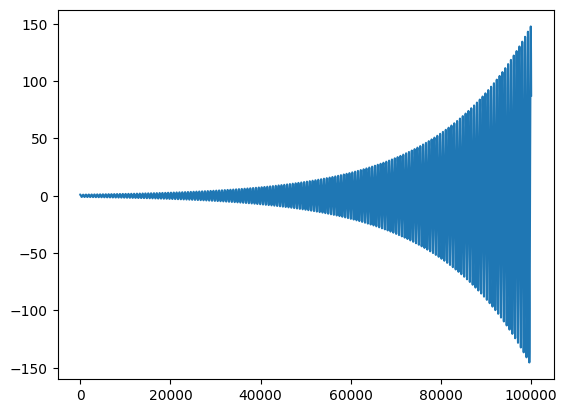

In [52]:
import matplotlib.pyplot as plt
plt.plot(xs)

### Floats

**Fixed point** number storage:
- Represent decimal numbers in computer systems where the number of bits after the decimal point is fixed. 

**Floating point** number storage:
- Allows a greater range of decimal numbers to be stored using a fixed number of bits, compared to fixed point number storage
- To understand floating point numbers, let's first consider *scientific notation* for decimal (base-10) values...

#### Scientific notation for decimal numbers


The **mantissa** controls the *precision* of a number. 
<br>(A *fixed point* number, normalised so that a maximum of 1 significant figure (s.f.) is to the left of the decimal point)

The **exponent** controls the *order of magnitude* of the number.
<br>This allows the decimal point to *float*, allowing a greater range of values to be represented than using the mantissa alone.

$
\boxed{\underbrace{M}_{mantissa} \times \underbrace{10}_{base}\overbrace{^E}^{exponent}}
$

- $ 1.234 \times 10^0 = 1.234 \\$
- $ 2.34 \times 10^1 = 23.4 \\$
- $ 5.987 \times 10^2 = 598.7 $

> Let's not worry about negative numbers.  They are easy enough to handle, most simply by just having another "bit" to indicate positive or negative.

When writing these numbers down, we have to use a fixed number of digits for both the mantissa and the exponent (otherwise we'd be writing forever).  All the examples above use four digits for the mantissa and one for the exponent (although you could use more to represent the same numbers).

- $
1.234 \times 10^0 
\textrm{ written as 4-digit mantissa }    \boxed{ \underbrace{1}_{1}.\underbrace{2}_{\frac{1}{10}}\underbrace{3}_{\frac{1}{100}}\underbrace{4}_{\frac{1}{1000}} } 
\textrm{ and 1-digit exponent }   \boxed{ \underbrace{0}_{1} }
$
- $
2.34 \times 10^1 
\textrm{ written as 4-digit mantissa }    \boxed{ \underbrace{2}_{1}.\underbrace{3}_{\frac{1}{10}}\underbrace{4}_{\frac{1}{100}}\underbrace{0}_{\frac{1}{1000}} } 
\textrm{ and 1-digit exponent }   \boxed{ \underbrace{1}_{1} }
$
- $
5.987 \times 10^2 
\textrm{ written as 4-digit mantissa }    \boxed{ \underbrace{5}_{1}.\underbrace{9}_{\frac{1}{10}}\underbrace{8}_{\frac{1}{100}}\underbrace{7}_{\frac{1}{1000}} } 
\textrm{ and 1-digit exponent }   \boxed{ \underbrace{2}_{1} }
$

> Is this glaringly obvious?  You're not missing anything, but we need to reinforce the idea of encoding a number in a finite amount of information before thinking about how a computer will store it.

With the limits above, there are some numbers we cannot represent:

- $ \color{red}{2.3456}$ : Mantissa can't be represented using four digits.  This is a _truncation_ error.  We can get close by rounding to $2.346 \times 10^0$.
- $ 1.5 \times 10^{\color{red}{12}}$ : Exponent $12$ can't be represented in one digit.  We can't even get close.  This is an _overflow_ error. 

#### Floating point binary numbers

Binary **floating point** number storage is similar to *scientific notation* for decimal (base-10) values, but with:
- a *binary* **mantissa** (normalised so that a maximum of 1 significant figure (s.f.) is to the left of the decimal point) 
- a *binary* **exponent** (whole number, no decimal point)
- a **base** of 2


$
\boxed{\underbrace{M}_{mantissa} \times \underbrace{2}_{base}\overbrace{^E}^{exponent}}
$


- $
1.25 = 1\frac{1}{4} \times 2^0 
\textrm{ written as 4-bit mantissa }    \boxed{ \underbrace{1}_{1}.\underbrace{0}_{\frac{1}{2}}\underbrace{1}_{\frac{1}{4}}\underbrace{0}_{\frac{1}{8}} } 
\textrm{ and 2-bit exponent }   \boxed{ \underbrace{0}_{2}\underbrace{0}_{1} }
$
- $
5.5 = 1\frac{3}{8} \times 2^2 
\textrm{ written as 4-bit mantissa }    \boxed{ \underbrace{1}_{1}.\underbrace{0}_{\frac{1}{2}}\underbrace{1}_{\frac{1}{4}}\underbrace{1}_{\frac{1}{8}} } 
\textrm{ and 2-bit exponent }   \boxed{ \underbrace{1}_{2}\underbrace{0}_{1} }
$
- $
12 = 1\frac{1}{2} \times 2^3 
\textrm{ written as 4-bit mantissa }    \boxed{ \underbrace{1}_{1}.\underbrace{1}_{\frac{1}{2}}\underbrace{0}_{\frac{1}{4}}\underbrace{0}_{\frac{1}{8}} } 
\textrm{ and 2-bit exponent }   \boxed{ \underbrace{1}_{2}\underbrace{1}_{1} }
$

When a fractional number is stored on a computer, a binary floating number is used to represent the value. There may not be enough bits in the mantissa and/or the exponent to represent the number exactly. In Python (and many other programming languages) __fractional numbers__ are stored on a computer using a fixed number of 64 bits <br>(53 bit mantissa, 11 bit exponent)

This limited number of bits can lead to a small error in the stored representation of a floating point number.  

**Comprehension Check** - Convert the below numbers from decimal into a floating point representation (use as many bits as necessary).

1. 84
2. 163


**Comprehension Check** - Convert the below numbers from floating point into decimal.

1. 1011 (mantissa), 11 (exponent)
2. 1111011 (mantissa), 1010 (exponent)

#### Floating Point Arithmetic

The limited precision also gives us challenges when doing calculations with different floating point numbers, even if we can store both of them.  For example, see what happens when we run the code below which compares two numbers.

In [1]:
e = 5/9
f = (1/3)*5*(1/3)
print('e is', e)
print('f is', f)
print(e == f)

e is 0.5555555555555556
f is 0.5555555555555555
False


Here, although e and f *should* be identical, the details of the floating point storage has led to them being *very* slightly different (even though they shouldn't be!), leading to a comparison that produces a result we don't expect. Note that nothing has gone wrong here- Python has processed the 'instructions' exactly as it's supposed to- the result is just not what we expect. Better practice in Python when comparing two floating point values is to instead check that they are within some tolerance of each other.

Consider another example where we take a number, add a different number and then immediately subtract if off again.

In [2]:
a = 1e-12
b = a + 1000000
c = b - 1000000
print('a is',a)
print('c is',c)

a is 1e-12
c is 0.0


Where did my $10^{-12}$ go?  Again, there is no error here, just a consequence of limited precision.  More on this topic later.

## Strings

A string is a collection of characters (alphabetical, numerical, or other e.g. punctuation) enclosed within single (`'...'`) or double (`"..."`) quotation marks.  

In [ ]:
c = "10"
d = 'python 3'
e = 'hello world!'

print(type(c))
print(type(d))
print(type(e))

Strings are stored on a computer as a series of bytes (8 bit binary number). An *encoding* system (such as ASCII or unicode) is a mapping between each character (e.g. `a`) and a unique binary value, used to represent the character. For example, in ASCII, the character 'A' has the number 65, 'B' is 66, and so on.

Unlike numerical data, `strings` are **subscriptable**. This means that each character of the string has an **index** that can be used to access it. Characters are **indexed** with integer values, starting from 0. We can return the Nth character of a string with `string_name[N]`

Print the first letter of x


In [ ]:
x = 'Hello'
print(x[0])

Print the last letter of x


In [ ]:
print(x[4])

Examples of methods for string objects:
 - `upper` (converts string to upper case letters)
 - `find` (finds index of first occurance of a specific character)

In [ ]:
x = 'hello'
y = x.upper()
print(y)

In [ ]:
z = x.find('l')
print(z)